<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Discussion:-Types-of-classification-datasets." data-toc-modified-id="Discussion:-Types-of-classification-datasets.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Discussion: Types of classification datasets.</a></span></li><li><span><a href="#Discussion:-Implications-of-false-positives-and-false-negatives" data-toc-modified-id="Discussion:-Implications-of-false-positives-and-false-negatives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Discussion: Implications of false positives and false negatives</a></span></li><li><span><a href="#Exercise:-Plot-the-accuracy-of-the-&quot;guessing-zero&quot;-model-as-a-function-of-number-of-1's-included-in-the-actual-data" data-toc-modified-id="Exercise:-Plot-the-accuracy-of-the-&quot;guessing-zero&quot;-model-as-a-function-of-number-of-1's-included-in-the-actual-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise: Plot the accuracy of the "guessing zero" model as a function of number of 1's included in the actual data</a></span></li><li><span><a href="#Exercise:-Derive-the-equation-for-the-discrimination-line-for-a-linear-2-dimensional-classification-problem" data-toc-modified-id="Exercise:-Derive-the-equation-for-the-discrimination-line-for-a-linear-2-dimensional-classification-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise: Derive the equation for the discrimination line for a linear 2-dimensional classification problem</a></span></li><li><span><a href="#Exercise:-Comparison-of-max-cost-and-counting-loss-functions" data-toc-modified-id="Exercise:-Comparison-of-max-cost-and-counting-loss-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise: Comparison of max cost and counting loss functions</a></span></li><li><span><a href="#Discussion:-What-are-the-two-main-challenges-of-the-max-cost-loss-function?" data-toc-modified-id="Discussion:-What-are-the-two-main-challenges-of-the-max-cost-loss-function?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Discussion: What are the two main challenges of the max cost loss function?</a></span></li><li><span><a href="#Exercise:-Compute-the-loss-function-for-the-perceptron-and-logistic-regression-loss-functions-after-optimization-for-the-&quot;Dataset-4&quot;-above." data-toc-modified-id="Exercise:-Compute-the-loss-function-for-the-perceptron-and-logistic-regression-loss-functions-after-optimization-for-the-&quot;Dataset-4&quot;-above.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise: Compute the loss function for the perceptron and logistic regression loss functions after optimization for the "Dataset 4" above.</a></span></li><li><span><a href="#Exercise:-Evaluating-the-effect-of-regularization-strength" data-toc-modified-id="Exercise:-Evaluating-the-effect-of-regularization-strength-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise: Evaluating the effect of regularization strength</a></span></li><li><span><a href="#Discussion:-Qualitative-effects-of-SVM-hyperparameters" data-toc-modified-id="Discussion:-Qualitative-effects-of-SVM-hyperparameters-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion: Qualitative effects of SVM hyperparameters</a></span></li><li><span><a href="#Exercise:-Optimizing-hyperparameters-for-SVM-models" data-toc-modified-id="Exercise:-Optimizing-hyperparameters-for-SVM-models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise: Optimizing hyperparameters for SVM models</a></span></li><li><span><a href="#Discussion:-Accuracy-of-1-Nearest-Neigbor-model" data-toc-modified-id="Discussion:-Accuracy-of-1-Nearest-Neigbor-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Discussion: Accuracy of 1-Nearest Neigbor model</a></span></li><li><span><a href="#Discussion:-Parameters-of-Naive-Bayes" data-toc-modified-id="Discussion:-Parameters-of-Naive-Bayes-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Discussion: Parameters of Naive Bayes</a></span></li><li><span><a href="#Exercise:-Training-Decision-Trees" data-toc-modified-id="Exercise:-Training-Decision-Trees-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Exercise: Training Decision Trees</a></span></li></ul></div>

# Classification Exercises

## Discussion: Types of classification datasets.

Consider the 4 datasets below. For each one determine if it is:

(1) Linearly separable

(2) Non-linearly separable

(3) Class balanced

(4) Multi-class

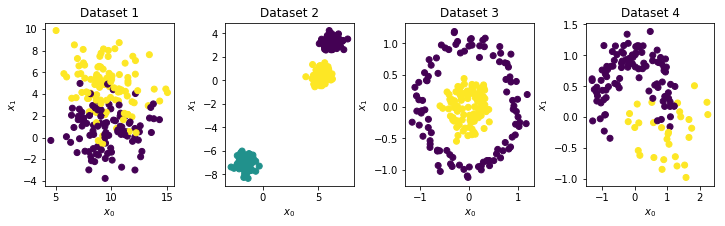

In [17]:
%matplotlib inline
import pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
np.random.seed(4) #make sure the same random samples are generated each time

noisiness = 1

X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=2*noisiness, n_features=2)

X_mc, y_mc = make_blobs(n_samples=200, centers=3, cluster_std=0.5*noisiness, n_features=2)

X_circles, y_circles = make_circles(n_samples=200, factor=0.3, noise=0.1*noisiness)

X_moons, y_moons = make_moons(n_samples=200, noise=0.25*noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1,4, figsize=(12, 3))

all_datasets = [[X_blob, y_blob],[X_mc, y_mc], [X_circles, y_circles],[X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c=yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace=0.4)

## Discussion: Implications of false positives and false negatives

Consider a medical test for a rare disease present in 0.01% of people. If a person has the disease, they must undergo an expensive treatment procedure. You develop a machine-learning algorithm that can predict whether or not someone has the disease with 99% accuracy based on the results of a simple blood test.

Would you recommend that doctors use your algorithm? Why or why not? What additional metric would you recommend for assessing the algorithm?

Hint: You may want to read [this write up](https://brownmath.com/stat/falsepos.htm) on the statistics of medical false positives.

## Exercise: Plot the accuracy of the "guessing zero" model as a function of number of 1's included in the actual data

## Exercise: Derive the equation for the discrimination line for a linear 2-dimensional classification problem

Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i=-1$ (class 2)

Where $\bar{\bar{X}} = [\vec{x_0}, \vec{x_1}, \vec{1}]$ and $\vec{w} = [w_0, w_1, w_2]$.

Derive the equation for the line that discriminates between the two classes?

## Exercise: Comparison of max cost and counting loss functions

Compare the value of the "max cost" and "counting" cost functions for a single point as a function of distance from the discrimination line. You may do this with analytical math, code, or a combination of math and discussion.

## Discussion: What are the two main challenges of the max cost loss function?


## Exercise: Compute the loss function for the perceptron and logistic regression loss functions after optimization for the "Dataset 4" above.

## Exercise: Evaluating the effect of regularization strength

Use the support vector machine loss function to optimize a classification model for "Dataset 1". Plot the discrimination line for $\alpha$ = [0, 1, 2, 10, 100].

## Discussion: Qualitative effects of SVM hyperparameters

Consider the two hyperparameters for kernel SVM:

* $\alpha$ (or $1/C$)
* $\gamma$ (or $1/(2\sigma)$)

Consider the limits as each hyperparameter goes to 0 or $\infty$. Will the decision boundary be more or less complex?

## Exercise: Optimizing hyperparameters for SVM models

Use `GridSearchCV` to find an optimal set of hyperparameters for an SVM model with "Dataset 4" above. Calculate the accuracy, precision, and recall for the best model.

## Discussion: Accuracy of 1-Nearest Neigbor model

Consider a 1-Nearest Neighbor model where a point is considered to be its own nearest neighbor. What will the accuracy of this model be for the training data? Will this be a reliable indicator of its accuracy for testing data? Briefly explain.

## Discussion: Parameters of Naive Bayes

Is the Naive Bayes alorithm a parametric or non-parametric model? If it is parametric, briefly describe the parameters of the model and how they are determined.

## Exercise: Training Decision Trees

Train a decision tree model on "Dataset 1" and plot it's accuracy for the training dataset as a function of the "maximum depth".